# 1.Importation des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# 2. Lecture et affichage du fichier

In [2]:
data = pd.read_csv('Energy_consumption.csv')
data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,1/1/2022 0:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,1/1/2022 1:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,1/1/2022 2:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,1/1/2022 3:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,1/1/2022 4:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,2/11/2022 11:00,28.619382,48.850160,1080.087000,5,Off,Off,21.194696,Saturday,No,82.306692
996,2/11/2022 12:00,23.836647,47.256436,1705.235156,4,Off,On,25.748176,Tuesday,Yes,66.577320
997,2/11/2022 13:00,23.005340,48.720501,1320.285281,6,Off,On,0.297079,Friday,Yes,72.753471
998,2/11/2022 14:00,25.138365,31.306459,1309.079719,3,On,Off,20.425163,Thursday,Yes,76.950389


# 3. Analyse des données

In [3]:
data.shape

(1000, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [5]:
data.isnull().sum()

Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64

# 4. Prétraitement des données

In [6]:
list_des_objects = ['Timestamp',
                   'HVACUsage',
                   'LightingUsage',
                   'DayOfWeek',
                   'Holiday']

In [7]:
for objets in list_des_objects:
    enc = LabelEncoder()
    data[objets] = enc.fit_transform(data[objets])
data

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,0,25.139433,43.431581,1565.693999,5,1,0,2.774699,1,0,75.364373
1,11,27.731651,54.225919,1411.064918,1,1,1,21.831384,2,0,83.401855
2,16,28.704277,58.907658,1755.715009,2,0,0,6.764672,3,0,78.270888
3,17,20.080469,50.371637,1452.316318,1,0,1,8.623447,6,0,56.519850
4,18,23.097359,51.401421,1094.130359,9,1,0,3.071969,0,0,70.811732
...,...,...,...,...,...,...,...,...,...,...,...
995,794,28.619382,48.850160,1080.087000,5,0,0,21.194696,2,0,82.306692
996,795,23.836647,47.256436,1705.235156,4,0,1,25.748176,5,1,66.577320
997,796,23.005340,48.720501,1320.285281,6,0,1,0.297079,0,1,72.753471
998,797,25.138365,31.306459,1309.079719,3,1,0,20.425163,4,1,76.950389


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   int64  
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   int64  
 6   LightingUsage      1000 non-null   int64  
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   int64  
 9   Holiday            1000 non-null   int64  
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 86.1 KB


<Axes: >

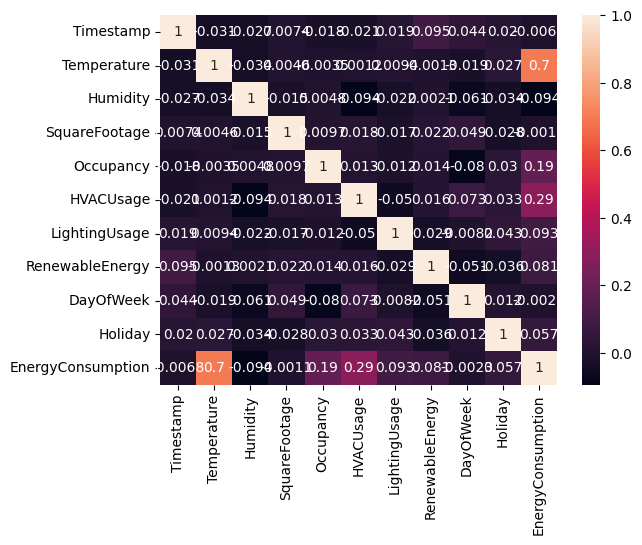

In [9]:
sns.heatmap(data.corr(), annot =True)

In [10]:
data.corr().EnergyConsumption.sort_values(ascending =False)

EnergyConsumption    1.000000
Temperature          0.696410
HVACUsage            0.286464
Occupancy            0.186580
LightingUsage        0.093423
RenewableEnergy      0.081160
Holiday              0.056676
SquareFootage       -0.001129
DayOfWeek           -0.002291
Timestamp           -0.006751
Humidity            -0.093583
Name: EnergyConsumption, dtype: float64

# 5. Division des données

In [11]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [12]:
print(X.shape, y.shape)

(1000, 10) (1000,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [14]:
# standardisation des données
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-0.38453152,  1.69912929, -0.72002437, ...,  1.76742313,
        -1.46261427, -0.93228691],
       [-0.36019554, -1.29891799, -0.35191352, ..., -1.67644709,
        -0.46253614, -0.93228691],
       [ 1.32593957,  0.3532151 , -1.12586058, ...,  1.06922539,
         1.03758106,  1.07263117],
       ...,
       [-1.44488453, -0.15262192, -0.21827014, ...,  0.27114832,
         0.03750293,  1.07263117],
       [-0.73566481,  1.44361044, -0.27110485, ..., -0.36335869,
        -0.9625752 ,  1.07263117],
       [-1.23281392,  1.7124519 ,  0.64112224, ..., -0.30045118,
         1.53762013, -0.93228691]])

# 6. Sélection des algorithmes

In [16]:
list_algo = [LinearRegression(),
            SVR(),
            DecisionTreeRegressor(),
            RandomForestRegressor()
            ]

# 7. Entrainement des modèles

In [17]:
for model in list_algo:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model}\n")
    print(f"Mean_square_error = {mean_squared_error(y_test, y_pred)}")
    print(f"r2_score: {r2_score(y_test, y_pred)}")
    score = cross_val_score(model, X_test, y_test, cv=6)
    print(f"Score: {score[1]}\n")

LinearRegression()

Mean_square_error = 24.501590487519902
r2_score: 0.6232323218806767
Score: 0.7666857399639454

SVR()

Mean_square_error = 29.209817985980372
r2_score: 0.550832616091942
Score: 0.5471500497240966

DecisionTreeRegressor()

Mean_square_error = 58.05535678734175
r2_score: 0.10726685313359363
Score: 0.3917080744324418

RandomForestRegressor()

Mean_square_error = 28.454755657118053
r2_score: 0.5624434166489805
Score: 0.6954825711129913



# 8. Affichage de la ligne de regression

In [18]:
subset = data[['Temperature', 'EnergyConsumption']] 
X_ln = subset.iloc[:, :-1]
y_ln = subset.iloc[:, -1]

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_ln, y_ln, test_size=0.2, random_state=40)

In [20]:
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [21]:
X_train1.shape

(800, 1)

In [22]:
model_linear = LinearRegression()

In [23]:
model_linear.fit(X_train1, y_train1)

LinearRegression()

In [24]:
y_pred_ln = model_linear.predict(X_test1)

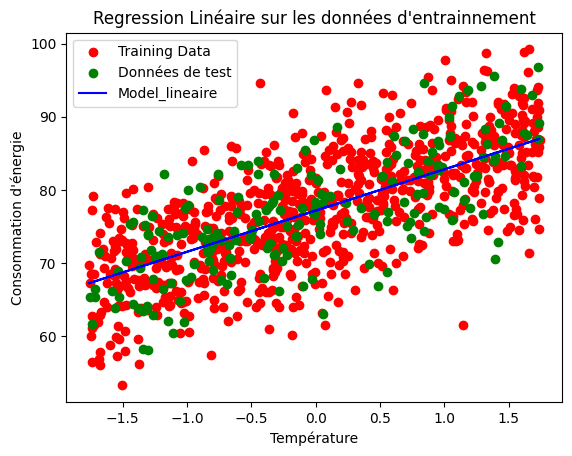

In [25]:
plt.scatter(X_train1, y_train1, c='r', label = "Training Data") 
plt.scatter(X_test1, y_test1, color ='green', label="Données de test")
plt.plot(X_train1, model_linear.predict(X_train1), color='b', label ="Model_lineaire")
plt.xlabel("Température")
plt.ylabel("Consommation d'énergie")
plt.title("Regression Linéaire sur les données d'entrainnement")
plt.legend()
plt.show()